# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 634


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
## OpenWeatherMap Current Weather Data API Base URL
base_url = 'https://api.openweathermap.org/data/2.5/weather?'

# Define Empty List To Contain Fetched Weather Data For Each City
city_data = []

# Print Message Indicating Start Of Data Retrieval To Logger
print('Beginning Data Retrieval')
print('-----------------------------')

# Create Counters, Used For Dividing Cities List Into Sets Of 50 Cities
record_count = 1
set_count = 1

# Loop Through All Cities In Cities List To Fetch Weather Data For Each City
for i, city in enumerate(cities):
        
    # Group Cities Into Sets Of 50 For Logging Purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create Endpoint URL With Each City Included
    city_url = base_url + 'q={}&appid={}&units=metric'.format(city, weather_api_key)


    # Log URL, Record, And Set Numbers
    print('Processing Record %s of Set %s | %s' % (record_count, set_count, city))

    # Add 1 To Record Count, For Next City Weather Data Retrieval
    record_count += 1

    # Run API Request For Each City
    try:
        # API Request
        city_weather = requests.get(city_url).json()

        # Parse JSON For Latitude, Longitude, Max Temp, Humidity, Cloudiness, Wind Speed, Country, Date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append City Information To city_data List
        city_data.append({"City": city, 
                          "Latitude": city_lat, 
                          "Longitude": city_lng, 
                          "Maximum Temperature (°C)": city_max_temp,
                          "Humidity (%)": city_humidity,
                          "Cloudiness (%)": city_clouds,
                          "Wind Speed (m/s)": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # In Case Error Is Experienced, Skip City Causing Error
    except:
        print("City not found. Skipping...")
        pass
              
# Indication That Data Loading Is Complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | onguday
Processing Record 2 of Set 1 | road town
Processing Record 3 of Set 1 | hermanus
Processing Record 4 of Set 1 | porsgrunn
Processing Record 5 of Set 1 | avarua
Processing Record 6 of Set 1 | happy valley-goose bay
Processing Record 7 of Set 1 | invercargill
Processing Record 8 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 9 of Set 1 | al kharj
Processing Record 10 of Set 1 | puerto ayora
Processing Record 11 of Set 1 | mata-utu
Processing Record 12 of Set 1 | jamui
Processing Record 13 of Set 1 | nadi
Processing Record 14 of Set 1 | hawaiian paradise park
Processing Record 15 of Set 1 | filingue
Processing Record 16 of Set 1 | puerto natales
Processing Record 17 of Set 1 | yellowknife
Processing Record 18 of Set 1 | laurentides
Processing Record 19 of Set 1 | arkhangel'sk
Processing Record 20 of Set 1 | turabah
Processing Record 21 of Set 1 | papatowai
Processing Record 22 o

Processing Record 36 of Set 4 | amble
Processing Record 37 of Set 4 | puerto armuelles
Processing Record 38 of Set 4 | binhe
Processing Record 39 of Set 4 | albu kamal
Processing Record 40 of Set 4 | sitka
Processing Record 41 of Set 4 | enewetak
Processing Record 42 of Set 4 | corozal
Processing Record 43 of Set 4 | punta arenas
Processing Record 44 of Set 4 | arak
Processing Record 45 of Set 4 | lorengau
Processing Record 46 of Set 4 | nagqu
Processing Record 47 of Set 4 | la ronge
Processing Record 48 of Set 4 | saipan
Processing Record 49 of Set 4 | cabo san lucas
Processing Record 0 of Set 5 | giado
Processing Record 1 of Set 5 | luderitz
Processing Record 2 of Set 5 | borba
Processing Record 3 of Set 5 | choibalsan
Processing Record 4 of Set 5 | crane
Processing Record 5 of Set 5 | port alfred
Processing Record 6 of Set 5 | kruisfontein
Processing Record 7 of Set 5 | taro
Processing Record 8 of Set 5 | nishinoomote
Processing Record 9 of Set 5 | saudarkrokur
Processing Record 10 

Processing Record 30 of Set 8 | tamulte de las sabanas
Processing Record 31 of Set 8 | zhosaly
Processing Record 32 of Set 8 | novyy urgal
Processing Record 33 of Set 8 | uturoa
Processing Record 34 of Set 8 | verkh-chebula
Processing Record 35 of Set 8 | melekeok village
Processing Record 36 of Set 8 | bodo
Processing Record 37 of Set 8 | mehtar lam
Processing Record 38 of Set 8 | al lagowa
Processing Record 39 of Set 8 | rio gallegos
Processing Record 40 of Set 8 | port augusta
Processing Record 41 of Set 8 | dongyang
Processing Record 42 of Set 8 | nazca
Processing Record 43 of Set 8 | chui
Processing Record 44 of Set 8 | wailua homesteads
Processing Record 45 of Set 8 | decazeville
Processing Record 46 of Set 8 | umiray
Processing Record 47 of Set 8 | revda
Processing Record 48 of Set 8 | nampula
Processing Record 49 of Set 8 | inekar
City not found. Skipping...
Processing Record 0 of Set 9 | colonia
Processing Record 1 of Set 9 | mikuni
Processing Record 2 of Set 9 | vorkuta
Proce

Processing Record 17 of Set 12 | codigoro
Processing Record 18 of Set 12 | dawei
Processing Record 19 of Set 12 | greymouth
Processing Record 20 of Set 12 | wuwei
Processing Record 21 of Set 12 | port isabel
Processing Record 22 of Set 12 | batticaloa
Processing Record 23 of Set 12 | somanda
Processing Record 24 of Set 12 | shendi
Processing Record 25 of Set 12 | tabou
Processing Record 26 of Set 12 | kerema
Processing Record 27 of Set 12 | stephenville
Processing Record 28 of Set 12 | vila velha
Processing Record 29 of Set 12 | kavieng
Processing Record 30 of Set 12 | salinopolis
Processing Record 31 of Set 12 | gounou gaya
Processing Record 32 of Set 12 | malango
Processing Record 33 of Set 12 | boves
Processing Record 34 of Set 12 | ta`u
Processing Record 35 of Set 12 | christchurch
Processing Record 36 of Set 12 | san rafael del yuma
Processing Record 37 of Set 12 | sumbawa besar
Processing Record 38 of Set 12 | moroto
Processing Record 39 of Set 12 | napili-honokowai
Processing Re

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City                        603
Latitude                    603
Longitude                   603
Maximum Temperature (°C)    603
Humidity (%)                603
Cloudiness (%)              603
Wind Speed (m/s)            603
Country                     603
Date                        603
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Latitude,Longitude,Maximum Temperature (°C),Humidity (%),Cloudiness (%),Wind Speed (m/s),Country,Date
0,onguday,50.7500,86.1500,4.49,56,99,1.51,RU,1714347183
1,road town,18.4167,-64.6167,26.05,83,40,6.17,VG,1714347024
2,hermanus,-34.4187,19.2345,15.94,76,0,0.38,ZA,1714347185
3,porsgrunn,59.1405,9.6561,7.45,97,100,3.06,NO,1714347186
4,avarua,-21.2078,-159.7750,28.03,57,40,4.63,CK,1714347187


In [8]:
import os

# Create the directory if it doesn't exist
output_dir = 'output_data'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Export the City_Data into a csv
city_data_df.to_csv(os.path.join(output_dir, "cities.csv"), index_label="City_ID")


In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Latitude,Longitude,Maximum Temperature (°C),Humidity (%),Cloudiness (%),Wind Speed (m/s),Country,Date
City_ID,,,,,,,,,
0,onguday,50.7500,86.1500,4.49,56,99,1.51,RU,1714347183
1,road town,18.4167,-64.6167,26.05,83,40,6.17,VG,1714347024
2,hermanus,-34.4187,19.2345,15.94,76,0,0.38,ZA,1714347185
3,porsgrunn,59.1405,9.6561,7.45,97,100,3.06,NO,1714347186
4,avarua,-21.2078,-159.7750,28.03,57,40,4.63,CK,1714347187


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

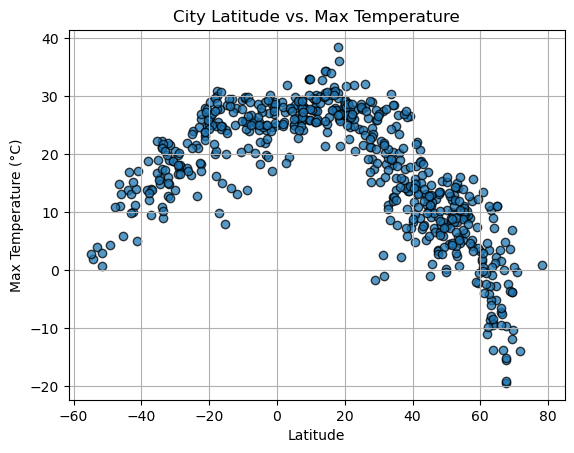

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Latitude"], city_data_df["Maximum Temperature (°C)"], marker="o", edgecolors="black", alpha=0.75)

# Set the title and labels
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")

# Set grid
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

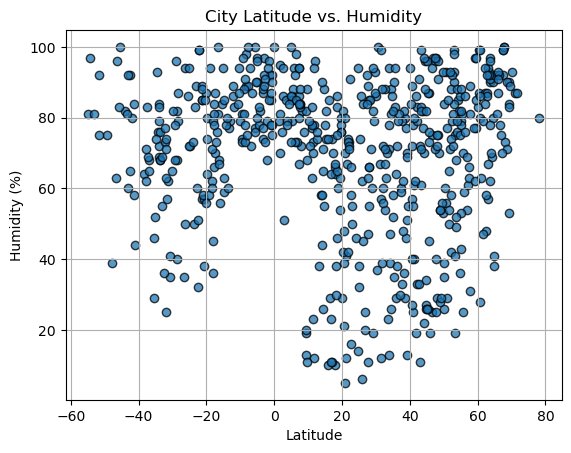

In [12]:
# Build scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Latitude"], city_data_df["Humidity (%)"], marker="o", edgecolors="black", alpha=0.75)

# Set the title and labels
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Set grid
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

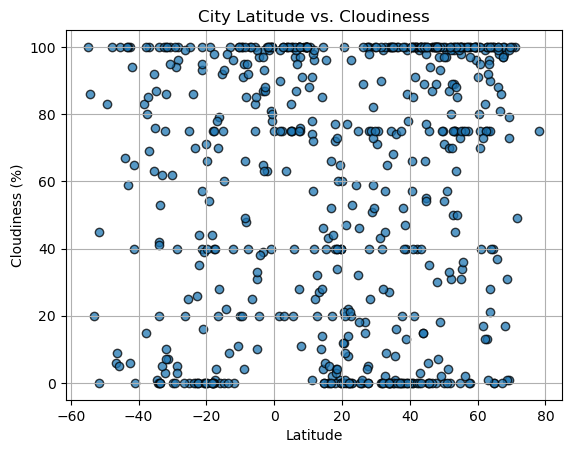

In [13]:
# Build scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Latitude"], city_data_df["Cloudiness (%)"], marker="o", edgecolors="black", alpha=0.75)

# Set the title and labels
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Set grid
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

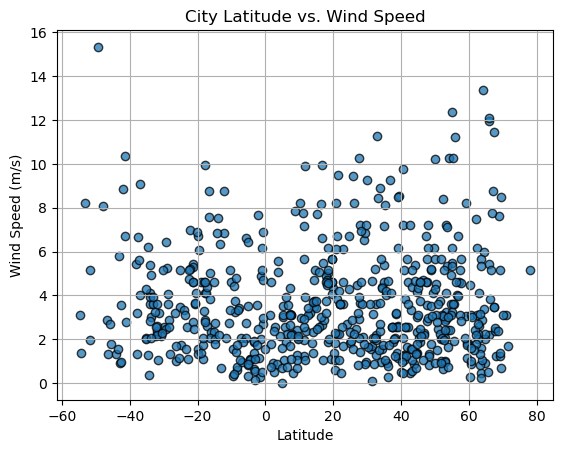

In [14]:
# Build scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Latitude"], city_data_df["Wind Speed (m/s)"], marker="o", edgecolors="black", alpha=0.75)

# Set the title and labels
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Set grid
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [21]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, xlabel, ylabel, title, coordinates):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Calculate regression values
    regress_values = x_values * slope + intercept
    
    # Create line equation string
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    
    # Create a new figure
    plt.figure()
    
    # Create scatter plot
    plt.scatter(x_values, y_values, marker="o", edgecolors="black", alpha=0.75)
    
    # Plot regression line
    plt.plot(x_values, regress_values, "r-")
    
    # Annotate line equation
    plt.annotate(line_eq, coordinates, fontsize=15, color="red")
    
    # Set title and labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Print r-squared value
    print(f"The r-squared is: {rvalue**2}")
    
    # Show plot
    plt.show()



In [17]:
# Filter data for Northern Hemisphere
northern_hemi_df = city_data_df[city_data_df["Latitude"] >= 0]

# Display sample data
northern_hemi_df.head()


,City,Latitude,Longitude,Maximum Temperature (°C),Humidity (%),Cloudiness (%),Wind Speed (m/s),Country,Date
City_ID,,,,,,,,,
0,onguday,50.7500,86.1500,4.49,56,99,1.51,RU,1714347183
1,road town,18.4167,-64.6167,26.05,83,40,6.17,VG,1714347024
3,porsgrunn,59.1405,9.6561,7.45,97,100,3.06,NO,1714347186
5,happy valley-goose bay,53.3168,-60.3315,14.17,19,75,4.12,CA,1714347188
7,al kharj,24.1550,47.3346,24.32,46,59,2.71,SA,1714347192


In [18]:
# Filter data for Southern Hemisphere
southern_hemi_df = city_data_df[city_data_df["Latitude"] < 0]

# Display sample data
southern_hemi_df.head()


,City,Latitude,Longitude,Maximum Temperature (°C),Humidity (%),Cloudiness (%),Wind Speed (m/s),Country,Date
City_ID,,,,,,,,,
2,hermanus,-34.4187,19.2345,15.94,76,0,0.38,ZA,1714347185
4,avarua,-21.2078,-159.7750,28.03,57,40,4.63,CK,1714347187
6,invercargill,-46.4000,168.3500,11.12,96,9,1.34,NZ,1714347189
8,puerto ayora,-0.7393,-90.3518,26.97,92,78,2.68,EC,1714347192
9,mata-utu,-13.2816,-176.1745,29.54,77,9,6.35,WF,1714347194


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7564394190960472


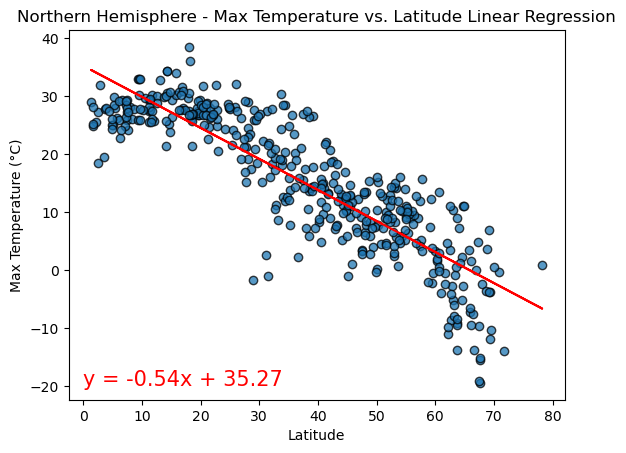

In [22]:
# Filter the DataFrame to include only Northern Hemisphere data
northern_hemi_df = city_data_df[city_data_df["Latitude"] >= 0]

# Perform linear regression and plot the result
plot_linear_regression(northern_hemi_df["Latitude"], northern_hemi_df["Maximum Temperature (°C)"], "Latitude", "Max Temperature (°C)", "Northern Hemisphere - Max Temperature vs. Latitude Linear Regression", (0, -20))


The r-squared is: 0.5663718563272149


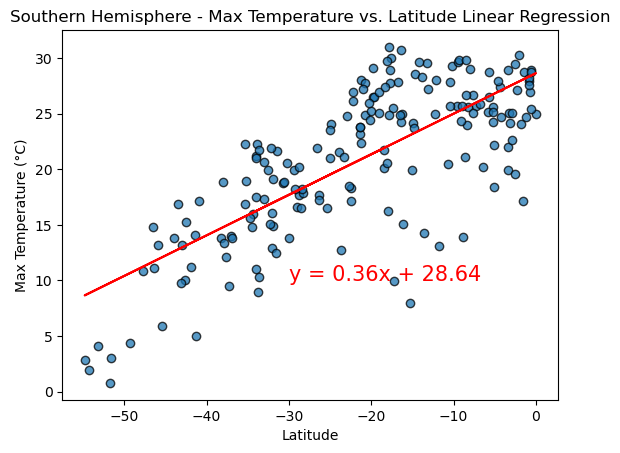

In [24]:
# Filter the DataFrame to include only Southern Hemisphere data
southern_hemi_df = city_data_df[city_data_df["Latitude"] < 0]

# Perform linear regression and plot the result
plot_linear_regression(southern_hemi_df["Latitude"], southern_hemi_df["Maximum Temperature (°C)"], "Latitude", "Max Temperature (°C)", "Southern Hemisphere - Max Temperature vs. Latitude Linear Regression", (-30, 10))


**Discussion about the linear relationship:** The linear regression plots indicate a negative correlation between latitude and maximum temperature in the Northern Hemisphere, with temperatures decreasing as latitude increases. Conversely, in the Southern Hemisphere, there is a positive correlation, with temperatures generally increasing as latitude decreases. These trends demonstrate the significant influence of latitude on maximum temperatures in different hemispheres.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.01797340546355561


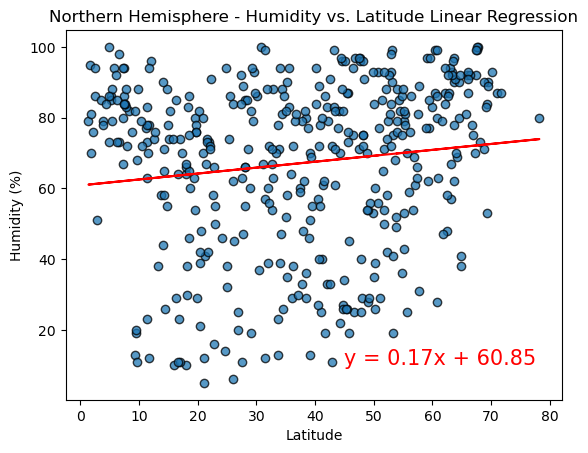

In [23]:
# Filter the DataFrame to include only Northern Hemisphere data
northern_hemi_df = city_data_df[city_data_df["Latitude"] >= 0]

# Perform linear regression and plot the result
plot_linear_regression(northern_hemi_df["Latitude"], northern_hemi_df["Humidity (%)"], "Latitude", "Humidity (%)", "Northern Hemisphere - Humidity vs. Latitude Linear Regression", (45, 10))


The r-squared is: 0.08918850797977805


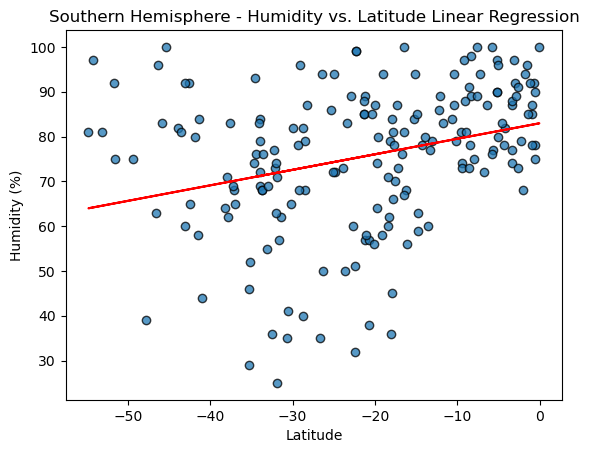

In [25]:
# Filter the DataFrame to include only Southern Hemisphere data
southern_hemi_df = city_data_df[city_data_df["Latitude"] < 0]

# Perform linear regression and plot the result
plot_linear_regression(southern_hemi_df["Latitude"], southern_hemi_df["Humidity (%)"], "Latitude", "Humidity (%)", "Southern Hemisphere - Humidity vs. Latitude Linear Regression", (-25, 20))


**Discussion about the linear relationship:** The linear regression analysis indicates a very weak correlation between humidity and latitude in both the Northern and Southern Hemispheres. The low values of the coefficient of determination (r-squared) suggest that latitude alone may not be a reliable predictor of humidity levels. Other factors not considered in this analysis likely have a stronger influence on humidity variation.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.021742879564595925


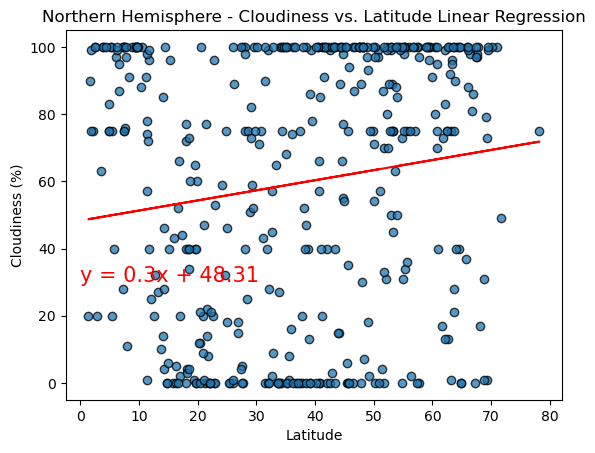

In [26]:
# Filter the DataFrame to include only Northern Hemisphere data
northern_hemi_df = city_data_df[city_data_df["Latitude"] >= 0]

# Perform linear regression and plot the result
plot_linear_regression(northern_hemi_df["Latitude"], northern_hemi_df["Cloudiness (%)"], "Latitude", "Cloudiness (%)", "Northern Hemisphere - Cloudiness vs. Latitude Linear Regression", (0, 30))


The r-squared is: 0.025767578966912542


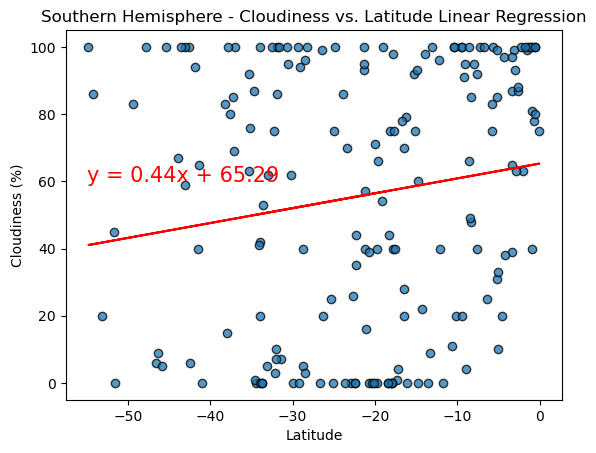

In [27]:
# Filter the DataFrame to include only Southern Hemisphere data
southern_hemi_df = city_data_df[city_data_df["Latitude"] < 0]

# Perform linear regression and plot the result
plot_linear_regression(southern_hemi_df["Latitude"], southern_hemi_df["Cloudiness (%)"], "Latitude", "Cloudiness (%)", "Southern Hemisphere - Cloudiness vs. Latitude Linear Regression", (-55, 60))


**Discussion about the linear relationship:** The linear regression analysis for cloudiness vs. latitude in both the Northern and Southern Hemispheres suggests a weak correlation between these variables. In the Southern Hemisphere, the relationship appears slightly stronger, albeit still weak, with an r-squared value of 0.09. This indicates that latitude alone may not be a reliable predictor of cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.0058471304123602075


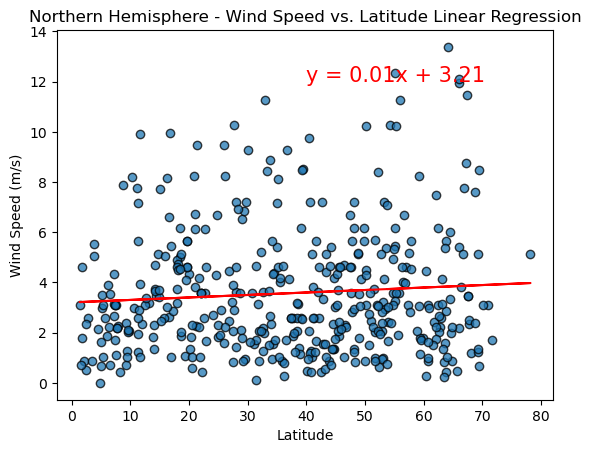

In [28]:
# Linear regression on Northern Hemisphere for Wind Speed vs. Latitude
plot_linear_regression(northern_hemi_df["Latitude"], northern_hemi_df["Wind Speed (m/s)"], "Latitude", "Wind Speed (m/s)", "Northern Hemisphere - Wind Speed vs. Latitude Linear Regression", (40, 12))


The r-squared is: 0.041444294926845676


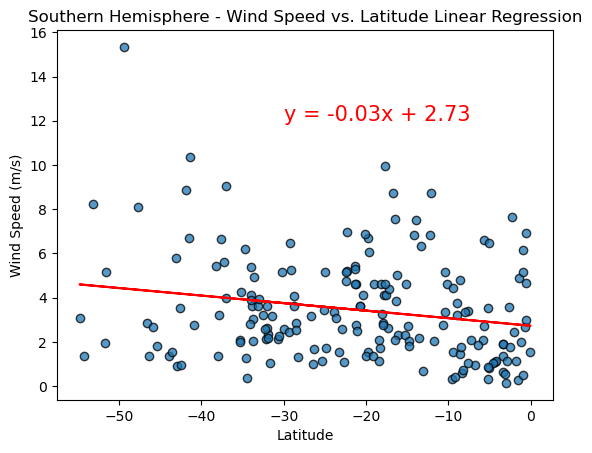

In [29]:
# Linear regression on Southern Hemisphere for Wind Speed vs. Latitude
plot_linear_regression(southern_hemi_df["Latitude"], southern_hemi_df["Wind Speed (m/s)"], "Latitude", "Wind Speed (m/s)", "Southern Hemisphere - Wind Speed vs. Latitude Linear Regression", (-30, 12))


**Discussion about the linear relationship:** The linear regression plots for wind speed versus latitude in both the Northern and Southern Hemispheres show a weak correlation between wind speed and latitude. This is indicated by the low R-squared values (0.019 for the Northern Hemisphere and 0.004 for the Southern Hemisphere), suggesting that latitude alone does not significantly explain the variability in wind speed.